# Pandas 2.0
- Appache Arrow Backend!

In [1]:
import pandas as pd
import numpy as np
import polars as pl
print('pandas', pd.__version__)
print('numpy', np.__version__)
print('polars', pl.__version__)

pandas 2.0.0rc0
numpy 1.24.2
polars 0.16.11


# Pandas Backend
- Numpy / Arrow

In [3]:
df = pd.read_csv('baby_names.csv')
df.head()

,Name,Sex,Count,Year
0,Emily,F,25735,1997
1,Jessica,F,21044,1997
2,Ashley,F,20895,1997
3,Sarah,F,20712,1997
4,Hannah,F,20594,1997


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052781 entries, 0 to 2052780
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Name    object
 1   Sex     object
 2   Count   int64 
 3   Year    int64 
dtypes: int64(2), object(2)
memory usage: 62.6+ MB


In [6]:
df['Count'].values

array([25735, 21044, 20895, ...,     5,     5,     5])

In [9]:
type(df['Count'].values)

numpy.ndarray

## Creating New Series

In [10]:
pd.Series([1, 2, 3, 4])

0    1
1    2
2    3
3    4
dtype: int64

In [12]:
pd.Series(['foo', 'bar', 'foobar'])

0       foo
1       bar
2    foobar
dtype: object

# Using the Arrow Backend

In [13]:
pd.Series([1, 2, 3, 4], dtype='int64[pyarrow]')

0    1
1    2
2    3
3    4
dtype: int64[pyarrow]

In [14]:
pd.Series(['foo', 'bar', 'foobar'], dtype='string[pyarrow]')

0       foo
1       bar
2    foobar
dtype: string

## Setting pandas to use arrow by default

In [16]:
pd.options.mode.dtype_backend = 'pyarrow'

df_arrow = pd.read_csv('baby_names.csv', use_nullable_dtypes=True)

In [17]:
df_arrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052781 entries, 0 to 2052780
Data columns (total 4 columns):
 #   Column  Dtype          
---  ------  -----          
 0   Name    string[pyarrow]
 1   Sex     string[pyarrow]
 2   Count   int64[pyarrow] 
 3   Year    int64[pyarrow] 
dtypes: int64[pyarrow](2), string[pyarrow](2)
memory usage: 61.0 MB


# Why Arrow?

## 1. Missing Values

In [19]:
pd.Series([1, 2, 3, None])

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [21]:
pd.Series([1, 2, 3, None], dtype='int64[pyarrow]')

0       1
1       2
2       3
3    <NA>
dtype: int64[pyarrow]

## 2. Speed

In [25]:
# Old numpy backend
%timeit df['Count'].mean()

1.72 ms ± 16.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [26]:
# Arrow backend
%timeit df_arrow['Count'].mean()

1.08 ms ± 87.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Speed: Reading in Data

In [29]:
%%timeit
# Reading in the data numpy backend
df = pd.read_csv('baby_names.csv')

588 ms ± 42.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
%%timeit
# Reading in the data
df_arrow = pd.read_csv('baby_names.csv',
                       engine='pyarrow',
                       use_nullable_dtypes=True)

30.1 ms ± 950 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Speed: String Operations

In [35]:
%timeit df['Name'].str.startswith('A')

394 ms ± 1.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%timeit df_arrow['Name'].str.startswith('A')

13.5 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# 3. Interoperability

Arrow is used by more than just pandas:
- R
- Spark
- Polars

In [40]:
print('polars', pl.__version__)

polars 0.16.11


In [42]:
df_arrow = pd.read_csv('baby_names.csv',
                       engine='pyarrow',
                       use_nullable_dtypes=True)

In [51]:
df_polars = pl.from_pandas(df_arrow)

agg_polars = (df_polars.groupby('Name')
                  .agg(pl.col(['Count'])
                  .sum().alias('totals'))
)

agg_pandas = agg_polars.to_pandas()

<Axes: title={'center': 'Top Baby Names'}, ylabel='Name'>

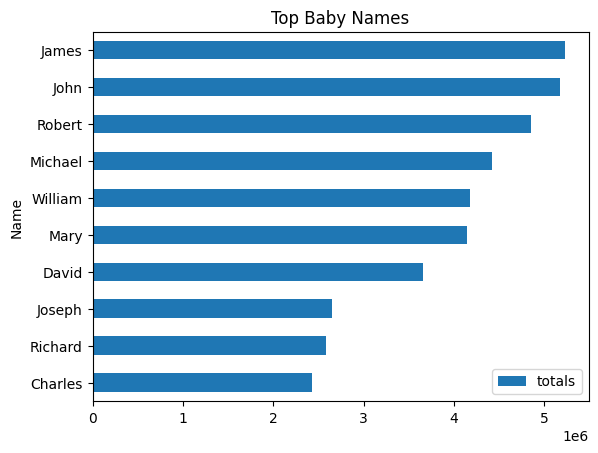

In [62]:
agg_pandas.set_index('Name')\
    .sort_values('totals', ascending=False) \
    .head(10) \
    .sort_values('totals') \
    .plot(kind='barh', title='Top Baby Names')

## 4. Arrow Data Types

In [73]:
pd.Series([True, False, True]).info()

<class 'pandas.core.series.Series'>
RangeIndex: 3 entries, 0 to 2
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
2 non-null      object
dtypes: object(1)
memory usage: 152.0+ bytes


In [76]:
pd.Series([True, False, None], dtype='bool[pyarrow]').info()

<class 'pandas.core.series.Series'>
RangeIndex: 3 entries, 0 to 2
Series name: None
Non-Null Count  Dtype        
--------------  -----        
2 non-null      bool[pyarrow]
dtypes: bool[pyarrow](1)
memory usage: 130.0 bytes


In [78]:
pd.Series([True, False, None])

0     True
1    False
2     None
dtype: object

In [87]:
import pyarrow as pa

articles = pandas.DataFrame({
    'title': pd.Series(['pandas 2.0 and the Arrow revolution',
                            'What I did this weekend'],
                           dtype='string[pyarrow]'),
    # 'tags': pd.Series([['pandas', 'arrow', 'data'],
    #                        ['scuba-diving', 'rock-climbing']],
    #                       dtype=pd.ArrowDtype(pa.list_(pa.string()))),
    'date': pd.Series([datetime.date(2023, 2, 22),
                           datetime.date(2022, 11, 3)],
                          dtype='date32[pyarrow]')
})

In [91]:
articles

,title,date
0,pandas 2.0 and the Arrow revolution,2023-02-22
1,What I did this weekend,2022-11-03


In [96]:
articles['date']

0   2023-02-22
1   2022-11-03
Name: date, dtype: date32[day][pyarrow]